In [33]:
import tensorflow as tf
import numpy as np
import random
import datetime
import joblib
import pandas as pd
import gradio as gr
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from tensorflow import keras
from matplotlib.cm import cool
from tensorflow.keras import layers
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,silhouette_score,precision_recall_fscore_support

In [182]:
(X_train,y_train),(X_test,y_test) =  tf.keras.datasets.mnist.load_data()

In [183]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.08333, random_state=42)

In [184]:
X_train, X_valid, X_test, y_train, y_valid, y_test
print("X_train.shape: ", X_train.shape)
print("X_valid.shape: ", X_valid.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_valid.shape: ", y_valid.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (55000, 28, 28)
X_valid.shape:  (5000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (55000,)
y_valid.shape:  (5000,)
y_test.shape:  (10000,)


In [191]:
from PIL import Image
im = Image.fromarray(X_test[100])
im.save("6.jpeg")

In [189]:
pwd

'/home/poornaprudhvigurram/Downloads'

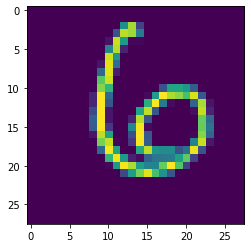

In [190]:
plt.imshow(X_test[100].reshape(28,28))

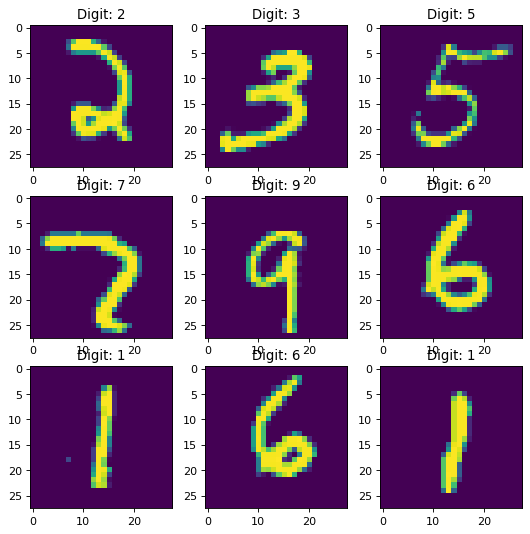

In [37]:

figure(figsize=(8, 8), dpi=80)

random_sample = random.choices(range(X_train.shape[0]),k=9)

count=1
for i in random_sample:
    plt.subplot(3,3,count)
    plt.imshow(X_train[i])
    plt.title(f"Digit: {y_train[i]}")
    count+=1

In [38]:
digits, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

In [39]:
def plot_freqency(counts,title=None):
    ax = plt.subplot()
    ax.set_xticks(digits)
    ax.set_xlabel('Category')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    plt.bar(digits,counts)

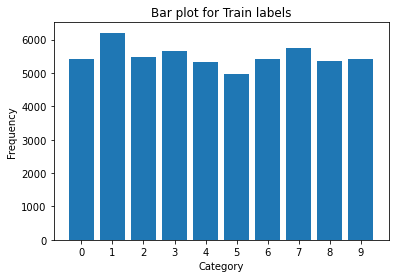

In [40]:
plot_freqency(train_counts,title='Bar plot for Train labels')

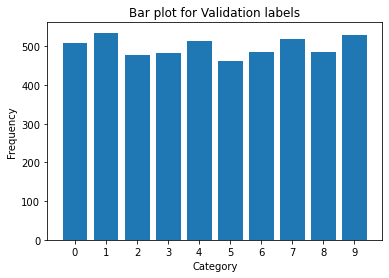

In [41]:
plot_freqency(valid_counts,title='Bar plot for Validation labels')

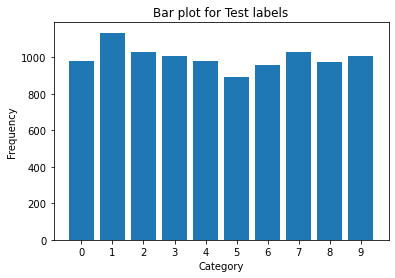

In [42]:
plot_freqency(test_counts,title='Bar plot for Test labels')

In [97]:
#Deep Neural Network
training_time=[]
train_accuracy=[]
test_accuracy=[]
valid_accuracy=[]

def DNN(X_train,X_test,X_valid,y_train,y_test,y_valid,final_layer_nodes=10,final_activation='softmax'):
    # normalize 
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]).astype('float32')/255
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]).astype('float32')/255
    X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1]).astype('float32')/255
    # change target to categorical
    y_train = keras.utils.to_categorical(y_train, len(set(y_train)))
    y_test = keras.utils.to_categorical(y_test, len(set(y_test)))
    y_valid = keras.utils.to_categorical(y_valid,len(set(y_valid)))
    
    # Network
    inputs = keras.Input(shape=((X_train.shape[1]),))
    nn = layers.Dense(512, input_shape=((X_train.shape[1]),),activation='relu')(inputs)
    nn = layers.Dropout(0.2)(nn)
    nn = layers.Dense(512, activation='relu')(nn)
    nn = layers.Dropout(0.2)(nn)
    predictions = layers.Dense(final_layer_nodes,activation=final_activation)(nn)
    dnn_model = keras.Model(inputs, predictions)
    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    start = datetime.datetime.now()
    dnn_model.fit(X_train, y_train,batch_size=128, epochs=1,validation_data=(X_valid, y_valid))
    stop = datetime.datetime.now()
    duration = stop-start
    print(f"DNN took {duration.total_seconds()} seconds")
    training_time.append(('DNN',duration))
    #Accuracy 
    y_train_pred = dnn_model.predict(X_train)
    y_test_pred = dnn_model.predict(X_test)
    y_valid_pred = dnn_model.predict(X_valid)
    
    
    y_train = tf.math.argmax(y_train, axis=1)
    y_test = tf.math.argmax(y_test, axis=1)
    y_valid = tf.math.argmax(y_valid, axis=1)
    y_train_pred = tf.math.argmax(y_train_pred, axis=1)
    y_test_pred = tf.math.argmax(y_test_pred, axis=1)
    y_valid_pred = tf.math.argmax(y_valid_pred, axis=1)
    
    print(f"DNN has an Training accuracy {accuracy_score(y_train,y_train_pred)}")
    print(f"DNN has an Validation accuracy {accuracy_score(y_valid,y_valid_pred)}")
    print(f"DNN has an Test accuracy {accuracy_score(y_test,y_test_pred)}")
    train_accuracy.append(('DNN',accuracy_score(y_train,y_train_pred)))
    test_accuracy.append(('DNN',accuracy_score(y_test,y_test_pred)))
    valid_accuracy.append(('DNN',accuracy_score(y_valid,y_valid_pred)))

    #classification report 
    
    print(f"DNN has an Training report \n {classification_report(y_train,y_train_pred)}")
    print(f"DNN has an Validation report \n{classification_report(y_valid,y_valid_pred)}")
    print(f"DNN has an Test report \n {classification_report(y_test,y_test_pred)}")
    
    # Confusion Matrix
    print(f"DNN has an Training report")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_train_pred))
    disp.plot()
    plt.show()
    print(f"DNN has an Validation report")
    vadisp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_valid,y_valid_pred))
    vadisp.plot()
    plt.show()
    print(f"DNN has an Test report")
    tedisp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred))
    tedisp.plot()
    
    plt.show()
    return dnn_model

In [101]:
def CNN(X_train,X_test,X_valid,y_train,y_test,y_valid,final_layer_nodes=10,final_activation='softmax'):
    root_val = int(np.sqrt(X_train.shape[1]))
    X_train = X_train.reshape((X_train.shape[0], root_val, root_val, 1))
    X_test = X_test.reshape((X_test.shape[0], root_val, root_val, 1))
    X_valid = X_valid.reshape((X_valid.shape[0], root_val, root_val, 1))

    # one hot encode target values
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)
    y_valid = keras.utils.to_categorical(y_valid)
    
    #Normalize
    X_train = X_train/255
    X_test = X_test/255
    X_valid = X_valid/255
    
    # CNN
    cnn_model = keras.Sequential()
    cnn_model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(root_val,root_val,1)))
    cnn_model.add(layers.BatchNormalization())
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(100, activation='relu'))
    cnn_model.add(layers.Dense(final_layer_nodes, activation=final_activation))
    # compile model
    cnn_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    start = datetime.datetime.now()
    cnn_model.fit(X_train, y_train, epochs=1, batch_size=128, validation_data=(X_valid, y_valid), verbose=1)
    stop = datetime.datetime.now()
    duration = stop-start
    print(f"CNN took {duration.total_seconds()} seconds")
    training_time.append(('CNN',duration))
    
    #Accuracy 
    y_train_pred = cnn_model.predict(X_train)
    y_test_pred = cnn_model.predict(X_test)
    y_valid_pred = cnn_model.predict(X_valid)
    
    y_train = tf.math.argmax(y_train, axis=1)
    y_test = tf.math.argmax(y_test, axis=1)
    y_valid = tf.math.argmax(y_valid, axis=1)
    y_train_pred = tf.math.argmax(y_train_pred, axis=1)
    y_test_pred = tf.math.argmax(y_test_pred, axis=1)
    y_valid_pred = tf.math.argmax(y_valid_pred, axis=1)
    
    print(f"CNN has an Training accuracy {accuracy_score(y_train,y_train_pred)}")
    print(f"CNN has an Validation accuracy {accuracy_score(y_valid,y_valid_pred)}")
    print(f"CNN has an Test accuracy {accuracy_score(y_test,y_test_pred)}")
    
    train_accuracy.append(('CNN',accuracy_score(y_train,y_train_pred)))
    test_accuracy.append(('CNN',accuracy_score(y_test,y_test_pred)))
    valid_accuracy.append(('CNN',accuracy_score(y_valid,y_valid_pred)))
    
    #classification report 
    
    print(f"CNN has an Training report \n {classification_report(y_train,y_train_pred)}")
    print(f"CNN has an Validation report \n{classification_report(y_valid,y_valid_pred)}")
    print(f"CNN has an Test report \n {classification_report(y_test,y_test_pred)}")
    
    # Confusion Matrix
    print(f"CNN has an Training report")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_train_pred))
    disp.plot()
    plt.show()
    print(f"CNN has an Validation report")
    vadisp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_valid,y_valid_pred))
    vadisp.plot()
    plt.show()
    print(f"CNN has an Test report")
    tedisp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred))
    tedisp.plot()
    
    plt.show()    
    
    return cnn_model

430/430 [==============================] - 16s 36ms/step - loss: 0.4699 - accuracy: 0.8595 - val_loss: 0.1058 - val_accuracy: 0.9696
DNN took 16.365109 seconds
DNN has an Training accuracy 0.9722363636363637
DNN has an Validation accuracy 0.9696
DNN has an Test accuracy 0.9662
DNN has an Training report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      5414
           1       0.97      0.99      0.98      6207
           2       0.97      0.98      0.97      5481
           3       0.97      0.96      0.96      5648
           4       0.97      0.97      0.97      5329
           5       0.98      0.96      0.97      4959
           6       0.97      0.98      0.98      5432
           7       0.98      0.98      0.98      5745
           8       0.97      0.95      0.96      5365
           9       0.96      0.96      0.96      5420

    accuracy                           0.97     55000
   macro avg       0.97      0.97      0.97

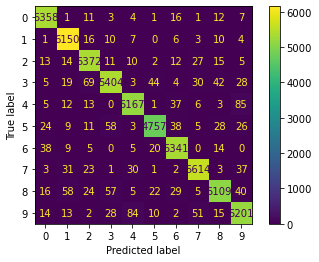

DNN has an Validation report


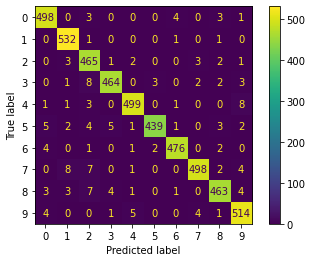

DNN has an Test report


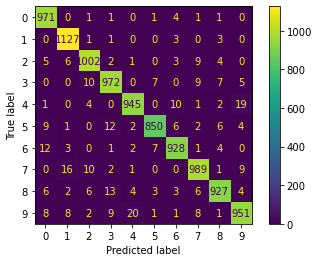

430/430 [==============================] - 34s 78ms/step - loss: 0.3188 - accuracy: 0.9050 - val_loss: 0.2442 - val_accuracy: 0.9690
CNN took 34.348575 seconds
CNN has an Training accuracy 0.9785636363636364
CNN has an Validation accuracy 0.969
CNN has an Test accuracy 0.9729
CNN has an Training report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5414
           1       0.95      1.00      0.97      6207
           2       1.00      0.96      0.98      5481
           3       1.00      0.96      0.98      5648
           4       0.96      0.99      0.98      5329
           5       0.99      0.98      0.99      4959
           6       0.99      0.99      0.99      5432
           7       0.98      0.99      0.98      5745
           8       0.98      0.96      0.97      5365
           9       0.97      0.96      0.97      5420

    accuracy                           0.98     55000
   macro avg       0.98      0.98      0.98 

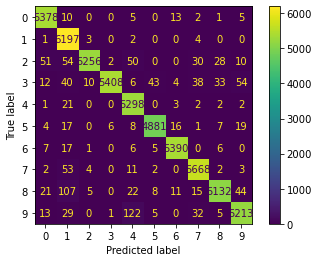

CNN has an Validation report


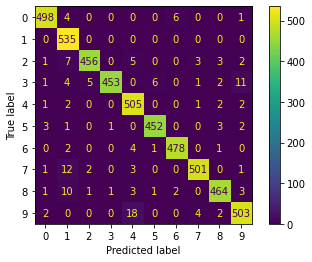

CNN has an Test report


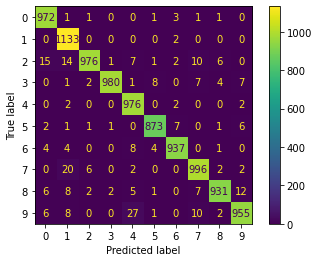

In [47]:
params = [X_train,X_test,X_valid,y_train,y_test,y_valid]
deep_models = [('DNN',DNN(*params)),('CNN',CNN(*params))]

In [48]:
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)
X_valid = X_valid.reshape(-1,784)

In [49]:
#Scaling 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [174]:
models = [ ('Logistic Regression',LogisticRegression(multi_class='multinomial')),
          ('KNN',KNeighborsClassifier()),
          ('RF',RandomForestClassifier()),
          ('DecisionTree',DecisionTreeClassifier()),
         ('SVM',SVC(probability=True))]

In [51]:
# Running Time
trained_models = []
for model in dict(models).items():
    start = datetime.datetime.now()
    model_train = model[1].fit(X_train,y_train)
    stop = datetime.datetime.now()
    duration = stop-start
    print(f"{model[0]} took {duration.total_seconds()} seconds")
    training_time.append((model[0],duration.total_seconds()))
    trained_models.append((model[0],model[1]))

/home/poornaprudhvigurram/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression took 58.831465 seconds
KNN took 0.125931 seconds
RF took 45.39012 seconds
DecisionTree took 23.049743 seconds
SVM took 426.465195 seconds


In [53]:
#Overall Accuracy
for model in trained_models:
    y_train_pred = model[1].predict(X_train)
    y_valid_pred = model[1].predict(X_valid)
    y_test_pred = model[1].predict(X_test)
    print(f"{model[0]} has an Training accuracy {accuracy_score(y_train,y_train_pred)}")
    print(f"{model[0]} has an Validation accuracy {accuracy_score(y_valid,y_valid_pred)}")
    print(f"{model[0]} has an Test accuracy {accuracy_score(y_test,y_test_pred)}")
    train_accuracy.append((model[0],accuracy_score(y_train,y_train_pred)))
    test_accuracy.append((model[0],accuracy_score(y_test,y_test_pred)))
    valid_accuracy.append((model[0],accuracy_score(y_valid,y_valid_pred)))

Logistic Regression has an Training accuracy 0.9434363636363636
Logistic Regression has an Validation accuracy 0.9214
Logistic Regression has an Test accuracy 0.9223
KNN has an Training accuracy 0.9634363636363636
KNN has an Validation accuracy 0.9502
KNN has an Test accuracy 0.9441
RF has an Training accuracy 1.0
RF has an Validation accuracy 0.9724
RF has an Test accuracy 0.9699
DecisionTree has an Training accuracy 1.0
DecisionTree has an Validation accuracy 0.8684
DecisionTree has an Test accuracy 0.8726
SVM has an Training accuracy 0.9860181818181818
SVM has an Validation accuracy 0.9674
SVM has an Test accuracy 0.965


In [54]:
# Per class accuracy
for model in trained_models:
    y_train_pred = model[1].predict(X_train)
    y_valid_pred = model[1].predict(X_valid)
    y_test_pred = model[1].predict(X_test)
    print(f"{model[0]} has an Training report \n {classification_report(y_train,y_train_pred)}")
    print(f"{model[0]} has an Validation report \n{classification_report(y_valid,y_valid_pred)}")
    print(f"{model[0]} has an Test report \n {classification_report(y_test,y_test_pred)}")

Logistic Regression has an Training report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5414
           1       0.97      0.98      0.97      6207
           2       0.94      0.93      0.94      5481
           3       0.93      0.92      0.92      5648
           4       0.95      0.95      0.95      5329
           5       0.92      0.91      0.91      4959
           6       0.96      0.97      0.97      5432
           7       0.95      0.95      0.95      5745
           8       0.92      0.91      0.91      5365
           9       0.92      0.93      0.92      5420

    accuracy                           0.94     55000
   macro avg       0.94      0.94      0.94     55000
weighted avg       0.94      0.94      0.94     55000

Logistic Regression has an Validation report 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       509
           1       0.95      0.98      0.

In [71]:
## Summary
pd.concat([pd.DataFrame(training_time,columns=['Method','Time']),
pd.DataFrame(train_accuracy,columns=['Method','Train Dataset']),
pd.DataFrame(test_accuracy,columns=['Method','Test Dataset']),
pd.DataFrame(valid_accuracy,columns=['Method','Validation Dataset'])],axis=1,join='inner').T.drop_duplicates().T

,Method,Time,Train Dataset,Test Dataset,Validation Dataset
0,DNN,0 days 00:00:16.365109,0.972236,0.9662,0.9696
1,CNN,0 days 00:00:34.348575,0.978564,0.9729,0.969
2,Logistic Regression,0 days 00:00:58.831465,0.943436,0.9223,0.9214
3,KNN,0 days 00:00:00.125931,0.963436,0.9441,0.9502
4,RF,0 days 00:00:45.390120,1.0,0.9699,0.9724
5,DecisionTree,0 days 00:00:23.049743,1.0,0.8726,0.8684
6,SVM,0 days 00:07:06.465195,0.986018,0.965,0.9674


Logistic Regression has an Training report


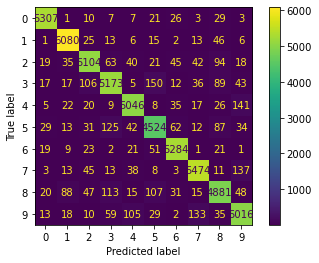

Logistic Regression has an Validation report


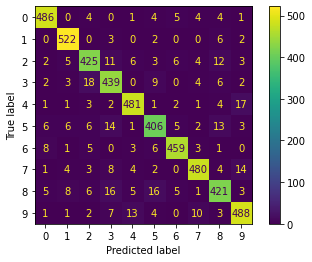

Logistic Regression has an Test report


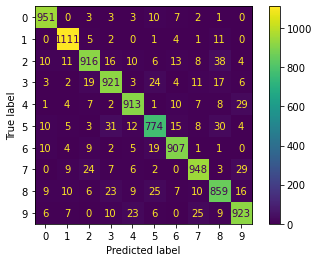

KNN has an Training report


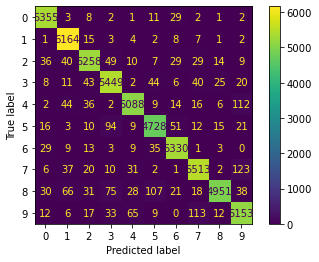

KNN has an Validation report


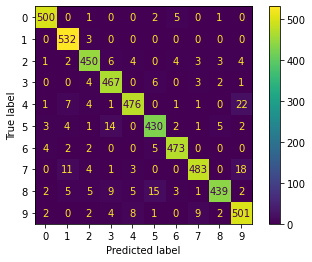

KNN has an Test report


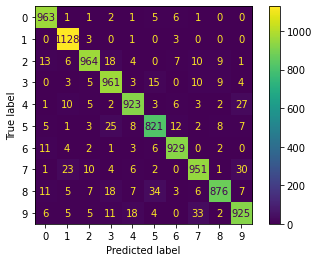

RF has an Training report


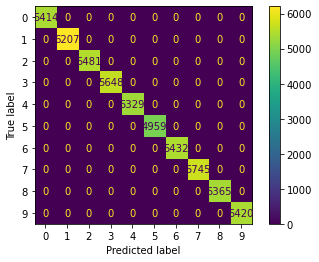

RF has an Validation report


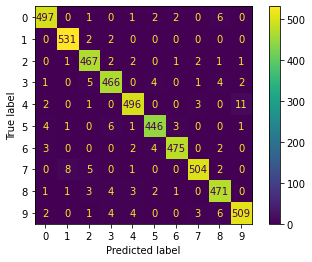

RF has an Test report


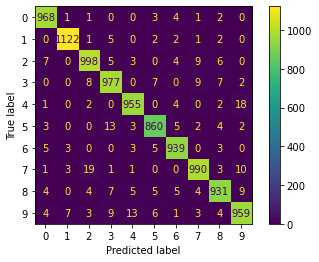

DecisionTree has an Training report


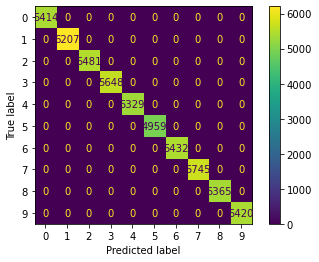

DecisionTree has an Validation report


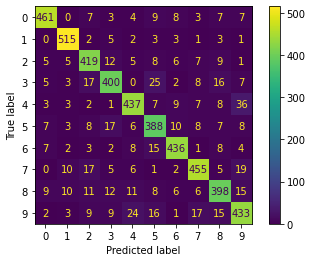

DecisionTree has an Test report


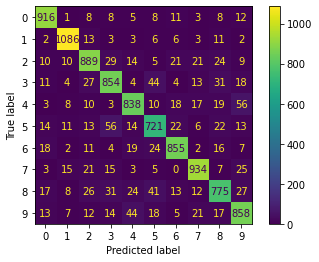

SVM has an Training report


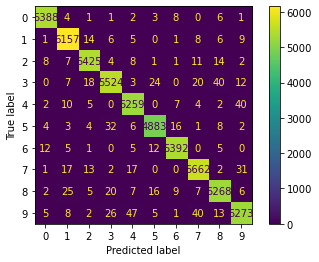

SVM has an Validation report


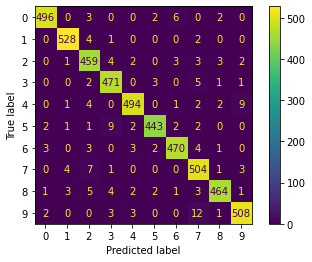

SVM has an Test report


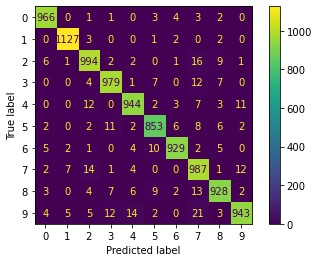

In [72]:
# Confusion matrix
for model in trained_models:
    y_train_pred = model[1].predict(X_train)
    y_valid_pred = model[1].predict(X_valid)
    y_test_pred = model[1].predict(X_test)
    
    print(f"{model[0]} has an Training report")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_train_pred),
                              display_labels=model[1].classes_)
    disp.plot()
    plt.show()
    print(f"{model[0]} has an Validation report")
    vadisp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_valid,y_valid_pred),
                              display_labels=model[1].classes_)
    vadisp.plot()
    plt.show()
    print(f"{model[0]} has an Test report")
    tedisp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred),
                              display_labels=model[1].classes_)
    tedisp.plot()
    
    plt.show()

In [80]:
path = 'models/'
for model in trained_models+deep_models:
    filename = path+f'{model[0]}.joblib'
    print(model)
    if model[0] in ['CNN','DNN']:
        model[1].save(f'{model[0]}')
    else:
        joblib.dump(model[1], filename)

('Logistic Regression', LogisticRegression(multi_class='multinomial'))
('KNN', KNeighborsClassifier())
('RF', RandomForestClassifier())
('DecisionTree', DecisionTreeClassifier())
('SVM', SVC())
('DNN', <tensorflow.python.keras.engine.functional.Functional object at 0x7fb80dd7cac0>)
INFO:tensorflow:Assets written to: DNN/assets
('CNN', <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fb8405c4ee0>)
INFO:tensorflow:Assets written to: CNN/assets


In [1]:
pwd

'/home/poornaprudhvigurram/Desktop/bias_research'